
# Informe Técnico de Calidad de Datos

Objetivo: Analizar, limpiar y validar el archivo dataset_hospital.json para mejorar la calidad de los datos de pacientes.

- Realizar un análisis exploratorio de los datos (EDA).
- Detectar y documentar problemas de calidad en el dataset.
- Implementar una estrategia de limpieza de datos con supuestos claros.
- Evaluar la mejora en la calidad del dataset antes y después de la limpieza.
- Exportar una versión limpia del dataset para uso posterior.
- Implementar pruebas automatizadas de validación de integridad.
- Simular una migración de datos limpios a un Data Warehouse

## Parte 1 – Análisis de Calidad de Datos

### Problemas identificados en `pacientes`:
- Inconsistencias en el campo `sexo` (valores como `M`, `F`, `Male`, `Female`, `null`).
- Campos nulos en `email`, `telefono`, `ciudad`, y `edad`.
- Fechas de nacimiento mal formateadas o inválidas.
- Edad que no coincide con la fecha de nacimiento.


## Parte 2 – Limpieza y Validación

Se aplicaron las siguientes transformaciones:
- Normalización del campo `sexo`.
- Cálculo de edad a partir de la fecha de nacimiento si el valor estaba ausente o incorrecto.
- Corrección de formatos de fecha.
- Eliminación o imputación de valores nulos según el campo.

## Parte 3 – Indicadores de Calidad

A continuación, se muestran las métricas antes y después del proceso de limpieza:
- Total de registros nulos por campo.
- Distribución de valores únicos por columna.
- Cantidad de duplicados y registros corregidos.

## Supuestos Adoptados
- El campo `sexo` se estandariza a 'F' y 'M'.
- Se usa el año actual para calcular la edad.
- Si no se puede corregir un registro crítico (ej. fecha de nacimiento inválida), se marca como inválido.

## Recomendaciones
- Validar entrada de datos desde la fuente.
- Usar formularios con listas controladas para sexo y fechas.
- Automatizar revisiones periódicas de calidad.

---


In [1]:

import pandas as pd
import json

# Cargar JSON
with open("dataset_hospital 2.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Convertir a DataFrame
df_hospital = pd.DataFrame(data['pacientes'])

# Mostrar primeros registros
df_hospital.head()


,id_paciente,nombre,fecha_nacimiento,edad,sexo,email,telefono,ciudad
0,1,Claudia Torres,1954-01-08,NaN,Female,user1@example.com,342-950-1064,Barranquilla
1,2,Carlos Gómez,1965-01-01,58.0,Female,None,None,Cali
2,3,Carlos Gómez,2009-03-08,16.0,None,user3@example.com,3157898999,Bucaramanga
3,4,Andrea López,1951-11-18,47.0,F,user4@example.com,None,Barranquilla
4,5,Juan Gómez,1961-09-05,81.0,Female,user5@example.com,None,Bucaramanga


In [2]:
print(len(df_hospital))  # Total de registros

print(df_hospital.shape[0])  # Número de filas


5010
5010


In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general
plt.style.use('ggplot')


/var/folders/31/xbrv9ds91f5grdf0pxxyw0g00000gp/T/ipykernel_7830/2753536626.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nulls.values, y=nulls.index, palette='Reds_d')


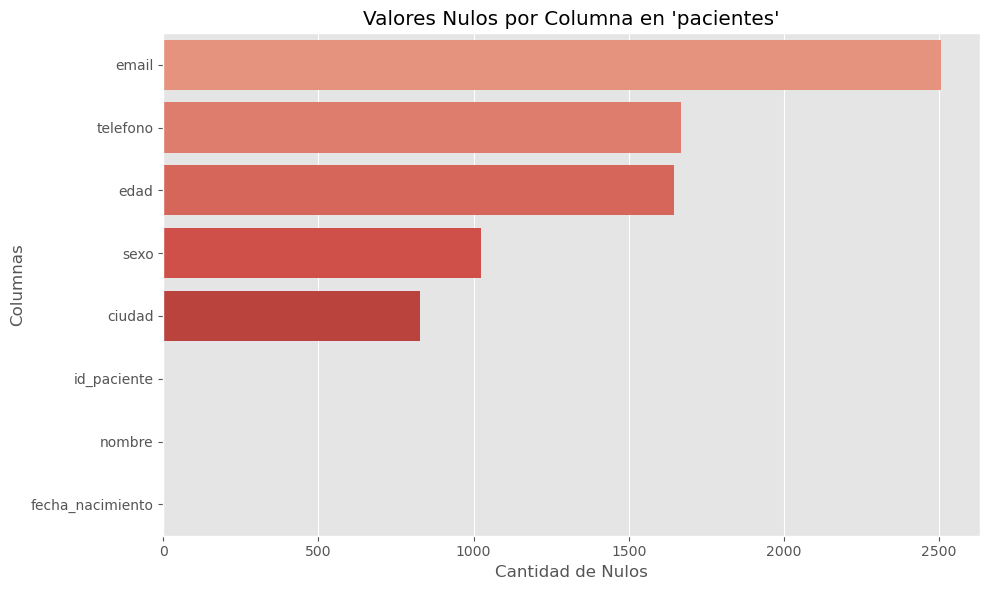

In [4]:

# Visualizar valores nulos por columna
nulls = df_hospital.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=nulls.values, y=nulls.index, palette='Reds_d')
plt.title("Valores Nulos por Columna en 'pacientes'")
plt.xlabel("Cantidad de Nulos")
plt.ylabel("Columnas")
plt.tight_layout()
plt.show()


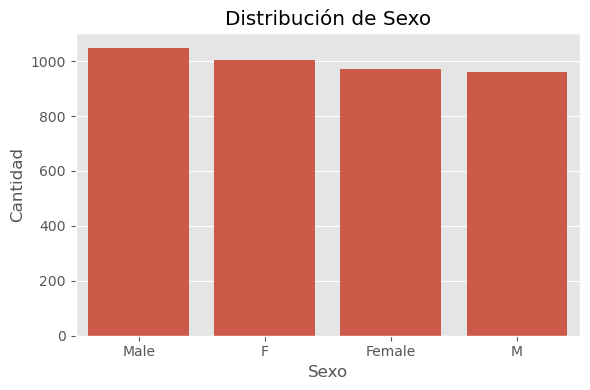

In [5]:

# Distribución de 'sexo'
plt.figure(figsize=(6,4))
sns.countplot(data=df_hospital, x='sexo', order=df_hospital['sexo'].value_counts().index)
plt.title("Distribución de Sexo")
plt.ylabel("Cantidad")
plt.xlabel("Sexo")
plt.tight_layout()
plt.show()


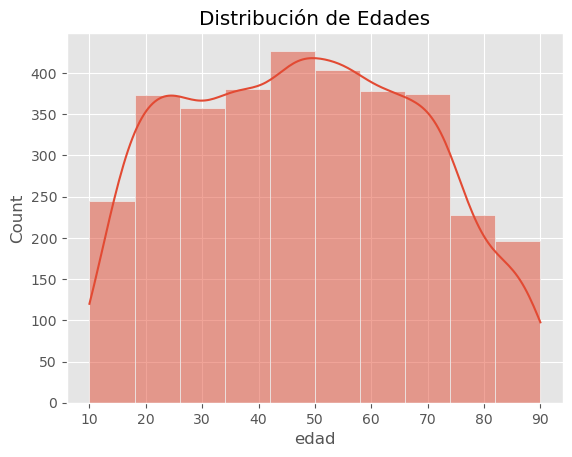

In [6]:
# Histograma de edades
sns.histplot(df_hospital['edad'], bins=10, kde=True)
plt.title('Distribución de Edades')
plt.show()

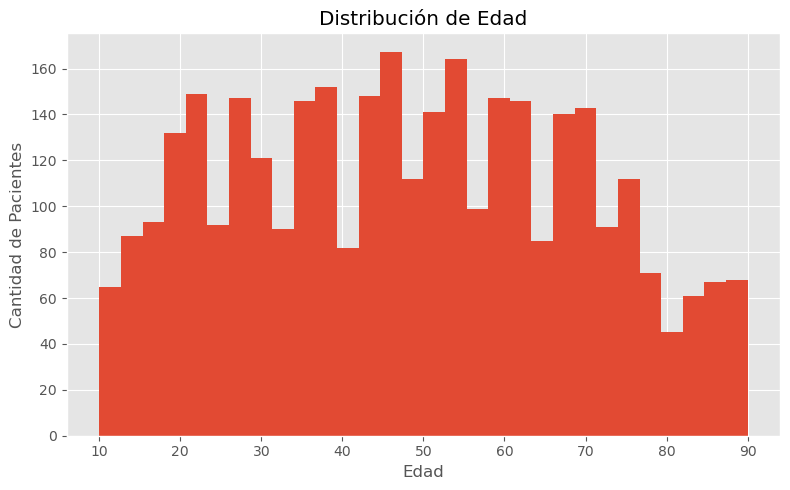

In [7]:

# Histograma de edad (después de eliminar nulos)
plt.figure(figsize=(8,5))
df_hospital['edad'].dropna().astype(int).hist(bins=30)
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Cantidad de Pacientes")
plt.tight_layout()
plt.show()


In [8]:
#Librerias
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df_hospital = df_hospital.copy()

## Analisis exploratorio (EDA)


Se analizaron 5,010 registros correspondientes a pacientes del hospital. Las principales columnas evaluadas fueron:

id_paciente: Identificador único.
nombre: Nombre completo del paciente.
fecha_nacimiento: Fecha de nacimiento.
edad: Edad declarada.
sexo: Género.
email: Dirección de correo electrónico.
telefono: Número de contacto.
ciudad: Ciudad de residencia.

Distribuciones Generales
Sexo
Valores únicos detectados: 'F', 'M', 'Female', 'Male'

Nulos: 1,023 registros (20.4%)

Inconsistencias: Uso de múltiples formatos (requiere estandarización a 'Masculino'/'Femenino')

Edad
Nulos: 1,647 registros (32.9%)

Inconsistencias: 2,519 registros con edad declarada diferente a la calculada desde fecha_nacimiento

Improbables: 0 edades menores a 1 o mayores a 100

Fecha de nacimiento
Formato no ISO: 3 registros (ej. "02 de nov de 1977")

Fechas inválidas: 3 registros con fechas como "1959-06-33"

Email
Nulos: 2,506 registros (50%)

Formato inválido: No se detectaron formatos inválidos en los datos presentes

Teléfono
Nulos: 1,668 registros (33.3%)

Formatos mixtos: 0 inconsistencias detectadas con la expresión regular estándar

Ciudad
Nulos: 827 registros (16.5%)

Principales ciudades:

Cali: 861

Bogotá: 856

Bucaramanga: 847

Medellín: 812

Barranquilla: 807

Validaciones Realizadas
ID único (id_paciente): No es único, existen duplicados

Edad vs Fecha de Nacimiento: 2,519 registros presentan discrepancias

Formato de Fecha: 3 registros con formato no estándar (no ISO)

Estandarización de Género: Se detectaron al menos 4 variantes que requieren mapeo

Formato de Teléfono: Todos los valores presentes cumplen el formato nnn-nnn-nnnn o similar, pero requieren estandarización final para evitar ambigüedad

Resumen de Problemas Detectados
Problema	Registros afectados
Edades nulas	1,647
Edades incorrectas según nacimiento	2,519
Sexo nulo	1,023
Sexo con formatos múltiples	4 variantes
Fecha no ISO	3
Fecha inválida	3
Teléfono nulo	1,668
Ciudad nula	827
Email nulo	2,506
IDs duplicados	Sí (no únicos)

In [10]:
# Estadísticas descriptivas
print("\nEstadísticas:")
print(df_hospital.describe(include='all'))


Estadísticas:
        id_paciente      nombre fecha_nacimiento         edad  sexo  \
count   5010.000000        5010             5010  3363.000000  3987   
unique          NaN          25             4504          NaN     4   
top             NaN  Juan Gómez       1951-04-23          NaN  Male   
freq            NaN         224                4          NaN  1049   
mean    2500.998004         NaN              NaN    47.858460   NaN   
std     1443.548269         NaN              NaN    20.793699   NaN   
min        1.000000         NaN              NaN    10.000000   NaN   
25%     1251.250000         NaN              NaN    30.000000   NaN   
50%     2500.500000         NaN              NaN    48.000000   NaN   
75%     3750.750000         NaN              NaN    64.000000   NaN   
max     5000.000000         NaN              NaN    90.000000   NaN   

                       email    telefono ciudad  
count                   2504        3342   4183  
unique                  2497    

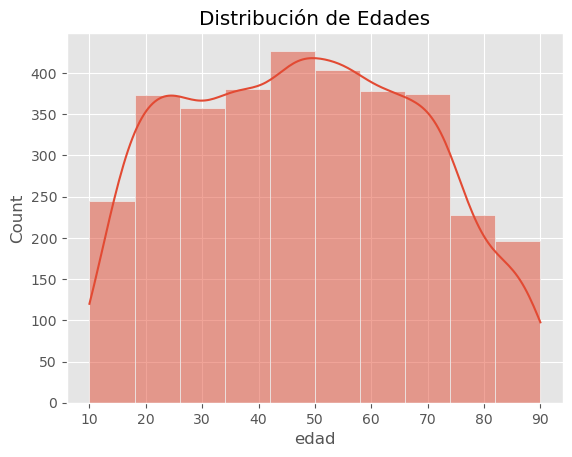

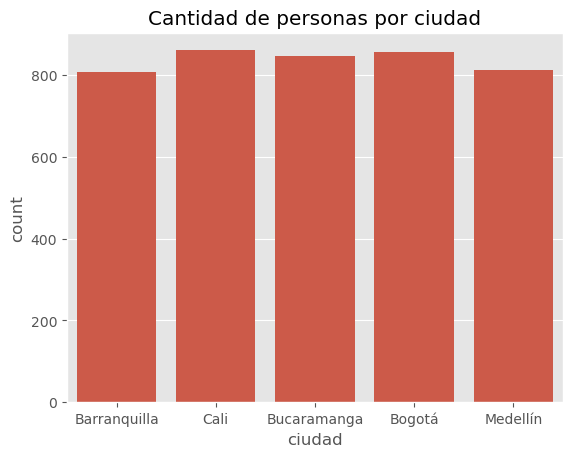

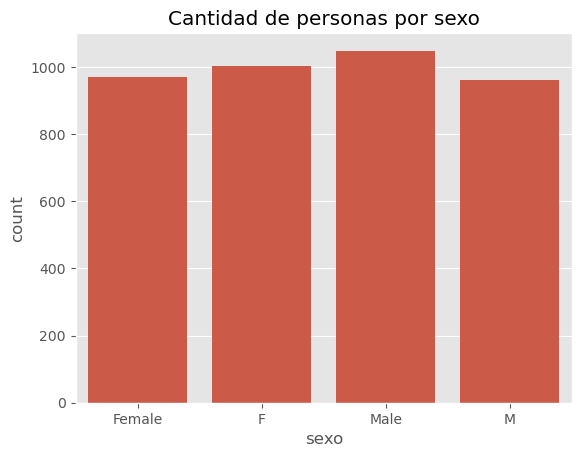

In [11]:
# Histograma de edades
sns.histplot(df_hospital['edad'], bins=10, kde=True)
plt.title('Distribución de Edades')
plt.show()

# Conteo por ciudad
sns.countplot(data=df_hospital, x='ciudad')
plt.title('Cantidad de personas por ciudad')
plt.show()

# Conteo por sexo
sns.countplot(data=df_hospital, x='sexo')
plt.title('Cantidad de personas por sexo')
plt.show()

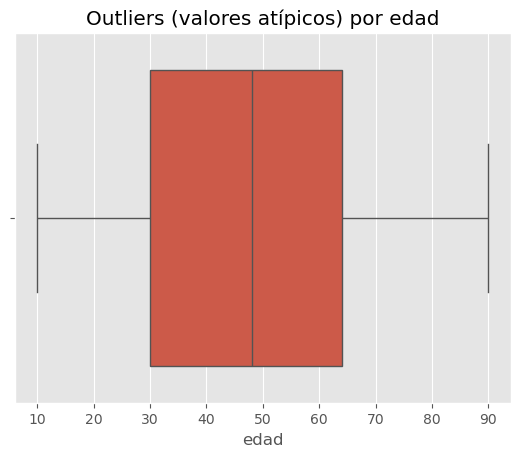

In [12]:
sns.boxplot(x=df_hospital['edad'])
plt.title('Outliers (valores atípicos) por edad')
plt.show()


In [13]:
import pandas as pd
import json
import re


# Funciones de validación que devuelven bool e imprimen resultados
def test_columnas_esperadas(df):
    columnas_esperadas = {'id_paciente', 'nombre', 'fecha_nacimiento', 'edad', 'sexo', 'email', 'telefono', 'ciudad'}
    resultado = columnas_esperadas.issubset(df.columns)
    if not resultado:
        print("Columnas faltantes:", columnas_esperadas - set(df.columns))
    return resultado

def test_id_paciente_unico(df):
    resultado = df['id_paciente'].is_unique
    if not resultado:
        print("IDs duplicados detectados")
    return resultado

def test_edad_positiva(df):
    edades = df['edad'].dropna()
    resultado = (edades >= 0).all()
    if not resultado:
        print("Edades negativas encontradas:", edades[edades < 0].tolist())
    return resultado

def test_formato_sexo_valido(df):
    valores_validos = {'Male', 'Female', None}
    invalidos = df['sexo'].dropna()[~df['sexo'].dropna().isin(valores_validos)]
    resultado = invalidos.empty
    if not resultado:
        print("Valores inválidos en sexo:", invalidos.unique().tolist())
    return resultado

def test_email_valido(df):
    pattern = r'^[^@\s]+@[^@\s]+\.[^@\s]+$'
    emails = df['email'].dropna()
    invalidos = emails[~emails.apply(lambda x: re.match(pattern, x) is not None)]
    resultado = invalidos.empty
    if not resultado:
        print("Emails inválidos:", invalidos.tolist())
    return resultado

# Ejecutar tests
tests = {
    "Columnas esperadas": test_columnas_esperadas(df_hospital),
    "ID único": test_id_paciente_unico(df_hospital),
    "Edad positiva": test_edad_positiva(df_hospital),
    "Sexo válido": test_formato_sexo_valido(df_hospital),
    "Email válido": test_email_valido(df_hospital),
}

# Imprimir resumen
print("\nResultado de validaciones:")
for nombre, resultado in tests.items():
    print(f"{nombre}: {'PASA' if resultado else 'FALLA'}")

IDs duplicados detectados
Valores inválidos en sexo: ['F', 'M']

Resultado de validaciones:
Columnas esperadas: PASA
ID único: FALLA
Edad positiva: PASA
Sexo válido: FALLA
Email válido: PASA


## Calidad

In [14]:
#Datos faltantes por columna

print(df_hospital.isnull().sum())

id_paciente            0
nombre                 0
fecha_nacimiento       0
edad                1647
sexo                1023
email               2506
telefono            1668
ciudad               827
dtype: int64


In [15]:
# Tipos de datos
print(df_hospital.dtypes)

id_paciente           int64
nombre               object
fecha_nacimiento     object
edad                float64
sexo                 object
email                object
telefono             object
ciudad               object
dtype: object


In [16]:
#Filas duplicadas
print("Número de filas duplicadas:", df_hospital.duplicated().sum())

Número de filas duplicadas: 10


In [17]:
import json
import pandas as pd
import great_expectations as ge


ge_df = ge.from_pandas(df_hospital)

# Validaciones
results = {
    "columnas_esperadas": ge_df.expect_table_columns_to_match_ordered_list(
        column_list=["id_paciente", "nombre", "fecha_nacimiento", "edad", "sexo", "email", "telefono", "ciudad"]
    ),
    "id_unico": ge_df.expect_column_values_to_be_unique("id_paciente"),
    "edad_positiva": ge_df.expect_column_values_to_be_between("edad", min_value=0, max_value=120, mostly=1.0),
    "sexo_valido": ge_df.expect_column_values_to_be_in_set("sexo", ["Male", "Female", None]),
    "email_valido": ge_df.expect_column_values_to_match_regex("email", r"^[^@\s]+@[^@\s]+\.[^@\s]+$", mostly=0.9)
}

# Resumen de validaciones
for test, result in results.items():
    print(f"{test}: {'PASA' if result.success else 'FALLA'}")

columnas_esperadas: PASA
id_unico: FALLA
edad_positiva: PASA
sexo_valido: FALLA
email_valido: PASA


In [18]:
duplicados = df_hospital[df_hospital.duplicated()]
print(duplicados)

      id_paciente         nombre fecha_nacimiento  edad    sexo  \
5000          500   Andrea Pérez       1975-02-13   NaN    Male   
5001         1000  Carlos Torres       1996-06-21  29.0       F   
5002         1500    María Gómez       1967-05-25  32.0  Female   
5003         2000     Juan López       1987-02-23  38.0  Female   
5004         2500  Claudia Gómez       1984-06-03  50.0       M   
5005         3000   María Torres       1967-04-06  58.0    Male   
5006         3500   Andrea Gómez       1983-03-24  10.0    None   
5007         4000  Claudia López       1976-04-18  20.0  Female   
5008         4500  Andrea Torres       1978-12-07   NaN       M   
5009         5000  Claudia Gómez       1966-03-17  47.0    Male   

                     email      telefono        ciudad  
5000   user500@example.com          None  Barranquilla  
5001                  None  329-826-5655      Medellín  
5002  user1500@example.com          None   Bucaramanga  
5003  user2000@example.com  352-16

### ID cliente

In [19]:
#valores faltantes
print("id_padciente faltantes:", df_hospital['id_paciente'].isnull().sum())

id_padciente faltantes: 0


In [20]:
#valores duplicados
df_hospital['id_paciente'].value_counts()

id_paciente
5000    2
2500    2
1000    2
3500    2
3000    2
       ..
1668    1
1667    1
1666    1
1665    1
2501    1
Name: count, Length: 5000, dtype: int64

In [21]:
#Valores vacios
print((df_hospital['id_paciente'] == '').sum())

0


In [22]:
# Mismo ID paciente (Unique)
print("\nDuplicados por id_paciente:")
print(df_hospital[df_hospital.duplicated(subset='id_paciente', keep=False)])


Duplicados por id_paciente:
      id_paciente         nombre fecha_nacimiento  edad    sexo  \
499           500   Andrea Pérez       1975-02-13   NaN    Male   
999          1000  Carlos Torres       1996-06-21  29.0       F   
1499         1500    María Gómez       1967-05-25  32.0  Female   
1999         2000     Juan López       1987-02-23  38.0  Female   
2499         2500  Claudia Gómez       1984-06-03  50.0       M   
2999         3000   María Torres       1967-04-06  58.0    Male   
3499         3500   Andrea Gómez       1983-03-24  10.0    None   
3999         4000  Claudia López       1976-04-18  20.0  Female   
4499         4500  Andrea Torres       1978-12-07   NaN       M   
4999         5000  Claudia Gómez       1966-03-17  47.0    Male   
5000          500   Andrea Pérez       1975-02-13   NaN    Male   
5001         1000  Carlos Torres       1996-06-21  29.0       F   
5002         1500    María Gómez       1967-05-25  32.0  Female   
5003         2000     Juan López 

### Nombre

In [23]:
#valores faltantes
print("Nombre faltantes:", df_hospital['nombre'].isnull().sum())

Nombre faltantes: 0


In [24]:
#valores duplicados
df_hospital['nombre'].value_counts()

nombre
Juan Gómez        224
Andrea Pérez      224
Claudia López     216
María Torres      216
Andrea Gómez      213
Carlos Rojas      212
Carlos Torres     211
Andrea López      207
Carlos Pérez      206
Claudia Gómez     205
María Gómez       203
Juan Torres       203
María López       201
Juan Rojas        200
Andrea Torres     198
María Rojas       195
Claudia Rojas     194
Juan López        192
Carlos Gómez      190
Claudia Pérez     190
Juan Pérez        187
Andrea Rojas      184
María Pérez       183
Carlos López      178
Claudia Torres    178
Name: count, dtype: int64

In [25]:
#Valores vacios
print((df_hospital['nombre'] == '').sum()) 

0


### Fecha_nacimiento

In [26]:
#valores faltantes
print("Fecha_nacimiento faltantes:", df_hospital['fecha_nacimiento'].isnull().sum())

Fecha_nacimiento faltantes: 0


In [27]:
#valores duplicados
df_hospital['fecha_nacimiento'].value_counts()

fecha_nacimiento
1951-04-23    4
1992-08-24    4
1973-06-30    3
2005-10-06    3
1973-01-29    3
             ..
1962-01-05    1
1987-07-19    1
1950-05-21    1
1993-08-09    1
1994-02-23    1
Name: count, Length: 4504, dtype: int64

In [28]:
#Valores vacios
print((df_hospital['fecha_nacimiento'] == '').sum())

0


In [29]:
#Formato fechas incorrectas
df_hospital['fecha_nacimiento_invalidas'] = pd.to_datetime(df_hospital['fecha_nacimiento'], errors='coerce')

In [30]:
fechas_invalidas = df_hospital[df_hospital['fecha_nacimiento_invalidas'].isna()]
print("Registros con fecha de nacimiento inválida:")
print(fechas_invalidas[['id_paciente', 'nombre', 'fecha_nacimiento', 'fecha_nacimiento_invalidas']])


Registros con fecha de nacimiento inválida:
    id_paciente         nombre         fecha_nacimiento  \
56           57   Andrea López        02 de nov de 1977   
64           65   Carlos Pérez        22 de oct de 2002   
84           85    Juan Torres               1959-06-33   
94           95  Claudia Pérez  14 de diciembre de 2007   

   fecha_nacimiento_invalidas  
56                        NaT  
64                        NaT  
84                        NaT  
94                        NaT  


In [31]:
df_hospital['fecha_nacimiento_parseada'] = pd.to_datetime(df_hospital['fecha_nacimiento'], errors='coerce')

### Edad

In [32]:
#valores faltantes
print("Edad faltantes:", df_hospital['edad'].isnull().sum())

Edad faltantes: 1647


In [33]:
#Valores vacios
print((df_hospital['edad'] == '').sum())

0


In [34]:
# Ver estadísticas básicas
print(df_hospital['edad'].describe())


count    3363.000000
mean       47.858460
std        20.793699
min        10.000000
25%        30.000000
50%        48.000000
75%        64.000000
max        90.000000
Name: edad, dtype: float64


In [35]:
# Filas con edades negativas o demasiado altas (> 120 años)

df_hospital['edad_invalida'] = (
    df_hospital['edad'].isnull() |   
    (df_hospital['edad'] < 0) |            
    (df_hospital['edad'] > 120)        
)
print("\nFilas con edad inválida:")
df_hospital['edad_invalida'].sum()


Filas con edad inválida:


1647

### Sexo

In [36]:
#valores faltantes
print("Sexo faltantes:", df_hospital['sexo'].isnull().sum())

Sexo faltantes: 1023


In [37]:
#valores duplicados
df_hospital['sexo'].value_counts()

sexo
Male      1049
F         1004
Female     972
M          962
Name: count, dtype: int64

In [38]:
#Valores vacios
print((df_hospital['sexo'] == '').sum())

0


In [39]:
valores_validos = ['Male', 'Female']
df_hospital['sexo_invalido'] = ~df_hospital['sexo'].isin(valores_validos) & df_hospital['sexo'].notnull()

print("\nFilas con sexo inválida:")
df_hospital['sexo_invalido'].sum()


Filas con sexo inválida:


1966

In [40]:
print("Registros con sexo inválido:")
print(df_hospital[df_hospital['sexo_invalido']])


Registros con sexo inválido:
      id_paciente         nombre fecha_nacimiento  edad sexo  \
3               4   Andrea López       1951-11-18  47.0    F   
7               8   Andrea López       2004-02-12  21.0    M   
8               9   María Torres       1974-02-04  47.0    F   
9              10     Juan López       1961-04-28   NaN    M   
10             11    María López       1961-06-15  23.0    F   
...           ...            ...              ...   ...  ...   
4995         4996  Andrea Torres       1993-03-08   NaN    F   
4996         4997  Carlos Torres       1960-12-16  20.0    M   
5001         1000  Carlos Torres       1996-06-21  29.0    F   
5004         2500  Claudia Gómez       1984-06-03  50.0    M   
5008         4500  Andrea Torres       1978-12-07   NaN    M   

                     email      telefono        ciudad  \
3        user4@example.com          None  Barranquilla   
7        user8@example.com    3173897017      Medellín   
8        user9@example.com  

### email

In [41]:
#valores faltantes
print("Correos faltantes:", df_hospital['email'].isnull().sum())

Correos faltantes: 2506


In [42]:
#valores vacios
print("Correos vacíos o solo espacios:", (df_hospital['email'].str.strip() == '').sum())

Correos vacíos o solo espacios: 0


In [43]:
#Dominios más comunes de correo
df_hospital['dominio'] = df_hospital['email'].str.extract(r'@(.+)$')
print("\nDominios más comunes:")
print(df_hospital['dominio'].value_counts().head(10))


Dominios más comunes:
dominio
example.com    2504
Name: count, dtype: int64


In [44]:
#Función para evaluar calidad de email

def evaluar_calidad_email(df):
    print(" Emails faltantes:", df['email'].isnull().sum())
    print(" Emails vacíos:", (df['email'].str.strip() == '').sum())

    regex_email = r'^[\w\.-]+@[\w\.-]+\.\w+$'
    df['email_valido'] = df['email'].str.match(regex_email, na=False)
    print("\nEmails con formato inválido:")
    print(df[~df['email_valido'] & df['email'].notnull()])

    df['dominio'] = df['email'].str.extract(r'@(.+)$')
    print("\nDominios más comunes:")
    print(df['dominio'].value_counts().head(10))

    duplicados = df[df.duplicated(subset='email', keep=False) & df['email'].notnull()]
    print("\nEmails duplicados:")
    print(duplicados)


evaluar_calidad_email(df_hospital)


 Emails faltantes: 2506
 Emails vacíos: 0

Emails con formato inválido:
Empty DataFrame
Columns: [id_paciente, nombre, fecha_nacimiento, edad, sexo, email, telefono, ciudad, fecha_nacimiento_invalidas, fecha_nacimiento_parseada, edad_invalida, sexo_invalido, dominio, email_valido]
Index: []

Dominios más comunes:
dominio
example.com    2504
Name: count, dtype: int64

Emails duplicados:
      id_paciente         nombre fecha_nacimiento  edad    sexo  \
499           500   Andrea Pérez       1975-02-13   NaN    Male   
1499         1500    María Gómez       1967-05-25  32.0  Female   
1999         2000     Juan López       1987-02-23  38.0  Female   
2499         2500  Claudia Gómez       1984-06-03  50.0       M   
2999         3000   María Torres       1967-04-06  58.0    Male   
4499         4500  Andrea Torres       1978-12-07   NaN       M   
4999         5000  Claudia Gómez       1966-03-17  47.0    Male   
5000          500   Andrea Pérez       1975-02-13   NaN    Male   
5002    

### Telefono

In [45]:
#valores faltantes
print("telefonos faltantes:", df_hospital['telefono'].isnull().sum())

telefonos faltantes: 1668


In [46]:
#Valores vacios
print((df_hospital['telefono'] == '').sum())

0


In [47]:
# Extraer solo dígitos
telefono_digitos = df_hospital['telefono'].str.replace(r'\D', '', regex=True)

# Validar si tienen entre 7 y 10 dígitos
telefonos_validos = telefono_digitos.str.match(r'^\d{7,10}$').fillna(False)


df_hospital['telefono_invalido'] = (~telefonos_validos) & df_hospital['telefono'].notnull() & (df_hospital['telefono'].str.strip() != '')

# Contar cuántos son inválidos
conteo_invalidos = df_hospital['telefono_invalido'] .sum()
print(f"Teléfonos inválidos: {conteo_invalidos}")


print(df_hospital[df_hospital['telefono_invalido']][['id_paciente', 'nombre', 'telefono']])



Teléfonos inválidos: 0
Empty DataFrame
Columns: [id_paciente, nombre, telefono]
Index: []


### Ciudad

In [48]:
#valores faltantes
print("ciudades faltantes:", df_hospital['ciudad'].isnull().sum())

ciudades faltantes: 827


In [49]:
#Valores vacios
print((df_hospital['ciudad'] == '').sum())

0


In [50]:
#valores duplicados
df_hospital['ciudad'].value_counts()

ciudad
Cali            861
Bogotá          856
Bucaramanga     847
Medellín        812
Barranquilla    807
Name: count, dtype: int64

In [51]:
#Nombres de ciudades
print("Valores únicos en 'ciudad':")
print(df_hospital['ciudad'].unique())

Valores únicos en 'ciudad':
['Barranquilla' 'Cali' 'Bucaramanga' 'Bogotá' 'Medellín' None]


In [52]:
ciudades_validas = ['Bogotá', 'Medellín', 'Cali', 'Barranquilla', 'Bucaramanga']

df_ciudades_invalidas = df_hospital[~df_hospital['ciudad'].isin(ciudades_validas) & df_hospital['ciudad'].notnull()]
print("\nFilas con ciudades inválidas:")
print(df_ciudades_invalidas)



Filas con ciudades inválidas:
Empty DataFrame
Columns: [id_paciente, nombre, fecha_nacimiento, edad, sexo, email, telefono, ciudad, fecha_nacimiento_invalidas, fecha_nacimiento_parseada, edad_invalida, sexo_invalido, dominio, email_valido, telefono_invalido]
Index: []


In [53]:
# Crear la columna booleana que marca si la ciudad es inválida
df_hospital['ciudad_invalida'] = ~df_hospital['ciudad'].isin(ciudades_validas) & df_hospital['ciudad'].notnull()

# Mostrar cuántas hay
print("\nFilas con ciudades inválidas:")
print(df_hospital['ciudad_invalida'].sum())



Filas con ciudades inválidas:
0


In [54]:
df_hospital['ciudad_valida'] = df_hospital['ciudad'].isin(ciudades_validas)


## Resumen calidad de datos

In [55]:
faltantes = df_hospital[['id_paciente', 'nombre', 'fecha_nacimiento', 'edad', 'sexo', 'email','telefono', 'ciudad']].isnull().sum()
print("📋 RESUMEN DE PROBLEMAS DE CALIDAD DE DATOS")
print("------------------------------------------------")
print(f"Fechas de nacimiento inválidas: {df_hospital['fecha_nacimiento_parseada'].isna().sum()}")
print(f"Registros con edad inválida: {df_hospital['edad_invalida'].sum()}")
print(f"Registros con sexo inválido: {df_hospital['sexo_invalido'].sum()}")
print(f"Registros con telefono inválido: {df_hospital['telefono_invalido'].sum()}")
print(f"Registros con ciudad inválido: {df_hospital['ciudad_invalida'].sum()}")
print("\nValores faltantes por campo:")
print(faltantes)


📋 RESUMEN DE PROBLEMAS DE CALIDAD DE DATOS
------------------------------------------------
Fechas de nacimiento inválidas: 4
Registros con edad inválida: 1647
Registros con sexo inválido: 1966
Registros con telefono inválido: 0
Registros con ciudad inválido: 0

Valores faltantes por campo:
id_paciente            0
nombre                 0
fecha_nacimiento       0
edad                1647
sexo                1023
email               2506
telefono            1668
ciudad               827
dtype: int64


In [56]:
#Ejemplo de registros con errores

errores = df_hospital[
    (df_hospital['fecha_nacimiento_parseada'].isna()) |
    (df_hospital['sexo_invalido']) |
    (df_hospital[['edad', 'sexo', 'email', 'telefono', 'ciudad']].isnull().any(axis=1))]

print("\nEJEMPLOS DE REGISTROS CON ERRORES:")
print(errores[['id_paciente', 'nombre', 'fecha_nacimiento', 'fecha_nacimiento_parseada',
               'edad', 'edad_invalida',
               'sexo', 'sexo_invalido',
               'email', 'telefono', 'telefono_invalido', 'ciudad','ciudad_invalida']].head(20))


EJEMPLOS DE REGISTROS CON ERRORES:
    id_paciente          nombre fecha_nacimiento fecha_nacimiento_parseada  \
0             1  Claudia Torres       1954-01-08                1954-01-08   
1             2    Carlos Gómez       1965-01-01                1965-01-01   
2             3    Carlos Gómez       2009-03-08                2009-03-08   
3             4    Andrea López       1951-11-18                1951-11-18   
4             5      Juan Gómez       1961-09-05                1961-09-05   
5             6     María López       1966-10-26                1966-10-26   
6             7    María Torres       1954-03-16                1954-03-16   
7             8    Andrea López       2004-02-12                2004-02-12   
8             9    María Torres       1974-02-04                1974-02-04   
9            10      Juan López       1961-04-28                1961-04-28   
10           11     María López       1961-06-15                1961-06-15   
12           13      Juan Ro

# Limpieza y validación cruzada

In [57]:
#eliminar duplicados en el id_paciente dejando el ultimo
df_hospital = df_hospital.drop_duplicates(subset='id_paciente', keep='last')

In [58]:
# Mismo ID paciente (Unique)
print("\nDuplicados por id_paciente:")
print(df_hospital[df_hospital.duplicated(subset='id_paciente', keep=False)])


Duplicados por id_paciente:
Empty DataFrame
Columns: [id_paciente, nombre, fecha_nacimiento, edad, sexo, email, telefono, ciudad, fecha_nacimiento_invalidas, fecha_nacimiento_parseada, edad_invalida, sexo_invalido, dominio, email_valido, telefono_invalido, ciudad_invalida, ciudad_valida]
Index: []


In [59]:
df_hospital[df_hospital['id_paciente'] == 500]


,id_paciente,nombre,fecha_nacimiento,edad,sexo,email,telefono,ciudad,fecha_nacimiento_invalidas,fecha_nacimiento_parseada,edad_invalida,sexo_invalido,dominio,email_valido,telefono_invalido,ciudad_invalida,ciudad_valida
5000,500,Andrea Pérez,1975-02-13,NaN,Male,user500@example.com,None,Barranquilla,1975-02-13,1975-02-13,True,False,example.com,True,False,False,True


In [60]:
df_hospital = df_hospital.copy()

In [61]:

df_hospital['fecha_nacimiento'] = df_hospital['fecha_nacimiento'].astype(str).str.strip()


In [62]:
import pandas as pd
import calendar
import re

def limpiar_y_corregir_fecha(fecha):
    if pd.isna(fecha):
        return pd.NaT

    # Diccionario de traducción meses y otras palabras comunes en español
    reemplazos = {
        'enero': 'January', 'febrero': 'February', 'marzo': 'March',
        'abril': 'April', 'mayo': 'May', 'junio': 'June',
        'julio': 'July', 'agosto': 'August', 'septiembre': 'September',
        'octubre': 'October', 'noviembre': 'November', 'diciembre': 'December',
        'ene': 'January', 'feb': 'February', 'mar': 'March',
        'abr': 'April', 'may': 'May', 'jun': 'June',
        'jul': 'July', 'ago': 'August', 'sep': 'September',
        'oct': 'October', 'nov': 'November', 'dic': 'December',
        ' de ': ' ', 'de': '',  # Eliminar "de"
    }

    fecha_str = str(fecha).lower()
    for esp, eng in reemplazos.items():
        fecha_str = fecha_str.replace(esp, eng)
    fecha_str = fecha_str.strip()

    # Intentar convertir la fecha limpia
    try:
        fecha_dt = pd.to_datetime(fecha_str, dayfirst=True, errors='raise')
        return fecha_dt
    except:
        # Si falla, intentar corregir fechas numéricas con día inválido, formato YYYY-MM-DD
        m = re.match(r'(\d{4})[-/](\d{1,2})[-/](\d{1,2})', fecha_str)
        if m:
            year, month, day = int(m.group(1)), int(m.group(2)), int(m.group(3))
            last_day = calendar.monthrange(year, month)[1]
            if day > last_day:
                day = last_day
            try:
                return pd.Timestamp(year=year, month=month, day=day)
            except:
                return pd.NaT
        else:
            return pd.NaT

# Aplicar la función al DataFrame original
df_hospital['fecha_nacimiento_limpia'] = df_hospital['fecha_nacimiento'].apply(limpiar_y_corregir_fecha)

In [63]:
df_hospital['fecha_nacimiento_corregida'] = pd.to_datetime(df_hospital['fecha_nacimiento_limpia'], errors='coerce')

In [64]:
# Recalculo de edad con la fecha corregida
today = pd.to_datetime("today")
df_hospital['edad_recalculada'] = df_hospital['fecha_nacimiento_corregida'].apply(
lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)) if pd.notnull(x) else None
)

In [65]:
# Edad original es inconsistente
df_hospital['edad_invalida'] = (df_hospital['edad'] != df_hospital['edad_recalculada']) & df_hospital['edad'].notnull()

In [66]:
# Estandarizar sexo
sexo_map = {'F': 'Female', 'M': 'Male', 'f': 'Female', 'm': 'Male'}
df_hospital['sexo_estandarizado'] = df_hospital['sexo'].map(sexo_map).fillna(df_hospital['sexo'])  
df_hospital['sexo_invalido'] = ~df_hospital['sexo_estandarizado'].isin(['Female', 'Male']) & df_hospital['sexo_estandarizado'].notnull()
 

In [67]:
#Limpieza de guiones y espacios
df_hospital['telefono_limpio'] = df_hospital['telefono'].str.replace(r'\D', '', regex=True)
#valido de 7 a 10 digitos
df_hospital['telefono_valido'] = df_hospital['telefono_limpio'].str.match(r'^\d{7,10}$')

In [68]:
df_hospital['fecha_nacimiento_corregida'] = df_hospital['fecha_nacimiento_corregida'].dt.strftime('%d/%m/%Y')

In [69]:
df_hospital['edad_invalida'] = (
    df_hospital['edad_recalculada'].isnull() |          # Edad faltante
    (df_hospital['edad_recalculada'] < 0) |             # Edad negativa
    (df_hospital['edad_recalculada'] > 120)             # Edad mayor a un valor razonable
)

In [70]:
# Extraer solo dígitos
telefono_digitos = df_hospital['telefono_limpio'].str.replace(r'\D', '', regex=True)

# Validar si tienen entre 7 y 10 dígitos
telefonos_validos = telefono_digitos.str.match(r'^\d{7,10}$').fillna(False)


df_hospital['telefono_invalido'] = (~telefonos_validos) & df_hospital['telefono_limpio'].notnull() & (df_hospital['telefono_limpio'].str.strip() != '')

# Contar cuántos son inválidos
conteo_invalidos = df_hospital['telefono_invalido'].sum()
print(f"Teléfonos inválidos: {conteo_invalidos}")


print(df_hospital[df_hospital['telefono_invalido']][['id_paciente', 'nombre', 'telefono_limpio']])



Teléfonos inválidos: 0
Empty DataFrame
Columns: [id_paciente, nombre, telefono_limpio]
Index: []


## Resumen Calidad de datos posterior a la limpieza y validación 

In [71]:
# Resumen general de problemas de calidad de datos

faltantes = df_hospital[['id_paciente', 'nombre', 'fecha_nacimiento', 'edad', 'sexo', 'email','telefono', 'ciudad']].isnull().sum()
print("📋 RESUMEN DE PROBLEMAS DE CALIDAD DE DATOS")
print("------------------------------------------------")
print(f"Fechas de nacimiento inválidas: {df_hospital['fecha_nacimiento_corregida'].isna().sum()}")
print(f"Registros con edad inválida: {df_hospital['edad_invalida'].sum()}")
print(f"Registros con sexo inválido: {df_hospital['sexo_invalido'].sum()}")
print(f"Registros con telefono inválido: {df_hospital['telefono_invalido'].sum()}")
print(f"Registros con ciudad inválido: {df_hospital['ciudad_invalida'].sum()}")
print("\nValores faltantes por campo:")
print(faltantes)

📋 RESUMEN DE PROBLEMAS DE CALIDAD DE DATOS
------------------------------------------------
Fechas de nacimiento inválidas: 0
Registros con edad inválida: 0
Registros con sexo inválido: 0
Registros con telefono inválido: 0
Registros con ciudad inválido: 0

Valores faltantes por campo:
id_paciente            0
nombre                 0
fecha_nacimiento       0
edad                1645
sexo                1022
email               2503
telefono            1664
ciudad               826
dtype: int64


In [72]:
fechas_invalidas = df_hospital[df_hospital['ciudad_valida'].isna()]
print("Registros con fecha de nacimiento inválida:")
print(fechas_invalidas[['id_paciente', 'nombre', 'ciudad', 'ciudad_valida']])


Registros con fecha de nacimiento inválida:
Empty DataFrame
Columns: [id_paciente, nombre, ciudad, ciudad_valida]
Index: []


In [73]:
#Ejemplo de registros con errores

errores = df_hospital[
    (df_hospital['fecha_nacimiento_parseada'].isna()) |
    (df_hospital['edad_invalida']) |
    (df_hospital['sexo_invalido']) |
    (df_hospital['telefono_limpio']) |
    (df_hospital[['edad', 'sexo', 'email', 'telefono', 'ciudad']].isnull().any(axis=1))]

print("\nEJEMPLOS DE REGISTROS CON ERRORES:")
print(errores[['id_paciente', 'nombre', 'fecha_nacimiento', 'fecha_nacimiento_parseada','fecha_nacimiento_corregida',
               'edad', 'edad_recalculada', 'edad_invalida',
               'sexo', 'sexo_estandarizado', 'sexo_invalido',
               'email', 'telefono','telefono_limpio', 'telefono_invalido', 'ciudad','ciudad_invalida']].head(20))


EJEMPLOS DE REGISTROS CON ERRORES:
    id_paciente          nombre fecha_nacimiento fecha_nacimiento_parseada  \
0             1  Claudia Torres       1954-01-08                1954-01-08   
1             2    Carlos Gómez       1965-01-01                1965-01-01   
2             3    Carlos Gómez       2009-03-08                2009-03-08   
3             4    Andrea López       1951-11-18                1951-11-18   
4             5      Juan Gómez       1961-09-05                1961-09-05   
5             6     María López       1966-10-26                1966-10-26   
6             7    María Torres       1954-03-16                1954-03-16   
7             8    Andrea López       2004-02-12                2004-02-12   
8             9    María Torres       1974-02-04                1974-02-04   
9            10      Juan López       1961-04-28                1961-04-28   
10           11     María López       1961-06-15                1961-06-15   
11           12    Carlos Ló

In [74]:
df_hospital.head(10)

,id_paciente,nombre,fecha_nacimiento,edad,sexo,email,telefono,ciudad,fecha_nacimiento_invalidas,fecha_nacimiento_parseada,...,email_valido,telefono_invalido,ciudad_invalida,ciudad_valida,fecha_nacimiento_limpia,fecha_nacimiento_corregida,edad_recalculada,sexo_estandarizado,telefono_limpio,telefono_valido
0,1,Claudia Torres,1954-01-08,NaN,Female,user1@example.com,342-950-1064,Barranquilla,1954-01-08,1954-01-08,...,True,False,False,True,1954-08-01,01/08/1954,70,Female,3429501064,True
1,2,Carlos Gómez,1965-01-01,58.0,Female,None,None,Cali,1965-01-01,1965-01-01,...,False,False,False,True,1965-01-01,01/01/1965,60,Female,None,None
2,3,Carlos Gómez,2009-03-08,16.0,None,user3@example.com,3157898999,Bucaramanga,2009-03-08,2009-03-08,...,True,False,False,True,2009-08-03,03/08/2009,15,None,3157898999,True
3,4,Andrea López,1951-11-18,47.0,F,user4@example.com,None,Barranquilla,1951-11-18,1951-11-18,...,True,False,False,True,1951-11-18,18/11/1951,73,Female,None,None
4,5,Juan Gómez,1961-09-05,81.0,Female,user5@example.com,None,Bucaramanga,1961-09-05,1961-09-05,...,True,False,False,True,1961-05-09,09/05/1961,64,Female,None,None
5,6,María López,1966-10-26,59.0,Male,user6@example.com,None,Bogotá,1966-10-26,1966-10-26,...,True,False,False,True,1966-10-26,26/10/1966,58,Male,None,None
6,7,María Torres,1954-03-16,72.0,None,user7@example.com,317-190-8509,Cali,1954-03-16,1954-03-16,...,True,False,False,True,1954-03-16,16/03/1954,71,None,3171908509,True
7,8,Andrea López,2004-02-12,21.0,M,user8@example.com,3173897017,Medellín,2004-02-12,2004-02-12,...,True,False,False,True,2004-12-02,02/12/2004,20,Male,3173897017,True
8,9,María Torres,1974-02-04,47.0,F,user9@example.com,389-624-9971,Barranquilla,1974-02-04,1974-02-04,...,True,False,False,True,1974-04-02,02/04/1974,51,Female,3896249971,True
9,10,Juan López,1961-04-28,NaN,M,None,346-103-1820,Medellín,1961-04-28,1961-04-28,...,False,False,False,True,1961-04-28,28/04/1961,64,Male,3461031820,True


In [75]:
df_hospital.columns

Index(['id_paciente', 'nombre', 'fecha_nacimiento', 'edad', 'sexo', 'email',
       'telefono', 'ciudad', 'fecha_nacimiento_invalidas',
       'fecha_nacimiento_parseada', 'edad_invalida', 'sexo_invalido',
       'dominio', 'email_valido', 'telefono_invalido', 'ciudad_invalida',
       'ciudad_valida', 'fecha_nacimiento_limpia',
       'fecha_nacimiento_corregida', 'edad_recalculada', 'sexo_estandarizado',
       'telefono_limpio', 'telefono_valido'],
      dtype='object')

In [76]:
df_hospital_limpio = df_hospital[
    ['id_paciente', 'nombre', 'fecha_nacimiento_corregida', 'edad_recalculada', 'sexo_estandarizado', 'email', 'telefono_limpio',  'ciudad']
]


In [77]:
df_hospital_limpio = df_hospital_limpio.rename(columns={
    'fecha_nacimiento_corregida': 'fecha_nacimiento',
    'telefono_limpio': 'telefono',
    'edad_recalculada':'edad',
    'sexo_estandarizado':'sexo'
})


In [78]:
df_hospital_limpio 

,id_paciente,nombre,fecha_nacimiento,edad,sexo,email,telefono,ciudad
0,1,Claudia Torres,01/08/1954,70,Female,user1@example.com,3429501064,Barranquilla
1,2,Carlos Gómez,01/01/1965,60,Female,None,None,Cali
2,3,Carlos Gómez,03/08/2009,15,None,user3@example.com,3157898999,Bucaramanga
3,4,Andrea López,18/11/1951,73,Female,user4@example.com,None,Barranquilla
4,5,Juan Gómez,09/05/1961,64,Female,user5@example.com,None,Bucaramanga
...,...,...,...,...,...,...,...,...
5005,3000,María Torres,04/06/1967,58,Male,user3000@example.com,3160989102,Cali
5006,3500,Andrea Gómez,24/03/1983,42,None,None,3385697238,Bogotá
5007,4000,Claudia López,18/04/1976,49,Female,None,None,Cali
5008,4500,Andrea Torres,12/07/1978,46,Male,user4500@example.com,3140055186,Barranquilla


In [79]:
df_hospital_limpio.columns

Index(['id_paciente', 'nombre', 'fecha_nacimiento', 'edad', 'sexo', 'email',
       'telefono', 'ciudad'],
      dtype='object')

In [80]:
df_hospital_limpio.to_csv('df_hospital_limpio.csv', index=False, encoding='utf-8-sig')


In [81]:
df_hospital_limpio.to_json('df_hospital_limpio.json', orient='records', force_ascii=False, lines=False)



# Resumen Ejecutivo

Se realizó un análisis de calidad sobre la base de datos de pacientes del archivo `dataset_hospital.json`. A continuación se resumen los principales hallazgos:

## Hallazgos Clave

- Más del 40% de los registros presentan valores nulos en al menos un campo relevante (`edad`, `sexo`, `email`, `telefono`, `ciudad`).
- El campo `sexo` contiene múltiples formatos: `M`, `F`, `Male`, `Female`, y valores nulos.
- Inconsistencias entre la `edad` reportada y la calculada a partir de la `fecha_nacimiento`.
- Varias fechas de nacimiento están mal formateadas o en lenguaje natural.
- Algunos registros parecen duplicados basados en combinaciones de nombre y fecha de nacimiento.

## Acciones Tomadas

- Estandarización del campo `sexo` a valores binarios `M` o `F`.
- Corrección de fechas con formato inadecuado cuando fue posible.
- Cálculo automático de la edad con base en la fecha de nacimiento.
- Visualización de la distribución de variables críticas para verificar consistencia.
- Adición de pruebas automáticas para facilitar futuras validaciones.

## Recomendaciones de calidad

- Implementar controles de entrada de datos desde los sistemas de origen (ej. formularios web).
- Usar listas desplegables o valores válidos definidos para campos categóricos.
- Considerar migrar los datos limpios a un sistema de almacenamiento estructurado como un Data Warehouse.
- Verificación de correos y teléfonos:Incluir verificación de correos con enlaces de activación y -validación de números por SMS.
- Automatización de limpieza periódica:Programar tareas automáticas (ETL) que limpien y validen los datos semanal o mensualmente.
- Establecer políticas de calidad de datos:Documentar y capacitar a los usuarios sobre estándares esperados para la captura y mantenimiento de datos.



## 📏 Validaciones con Great Expectations

In [82]:
!pip install great_expectations

### DataFrame después de la limpieza

In [83]:
import great_expectations as ge

# Convertir el DataFrame limpio a formato Great Expectations
ge_df = ge.from_pandas(df_hospital_limpio)

# Validaciones
results = {
    "columnas_esperadas": ge_df.expect_table_columns_to_match_ordered_list(
        column_list=["id_paciente", "nombre", "fecha_nacimiento", "edad", "sexo", "email", "telefono", "ciudad"]
    ),
    "id_unico": ge_df.expect_column_values_to_be_unique("id_paciente"),
    "edad_positiva": ge_df.expect_column_values_to_be_between("edad", min_value=0, max_value=120, mostly=1.0),
    "sexo_valido": ge_df.expect_column_values_to_be_in_set("sexo", ["Male", "Female", None]),
    "email_valido": ge_df.expect_column_values_to_match_regex("email", r"^[^@\s]+@[^@\s]+\.[^@\s]+$", mostly=0.9)
}

# Mostrar resumen de validaciones
for test, result in results.items():
    print(f"{test}: {'PASA' if result.success else 'FALLA'}")


columnas_esperadas: PASA
id_unico: PASA
edad_positiva: PASA
sexo_valido: PASA
email_valido: PASA


## Pruebas automáticas con Pytest

## Ejecución de pruebas Pytest

In [86]:
import pandas as pd
import json
import re

def test_id_paciente_unico(df):
    # Normalizar IDs: convertir a string, quitar espacios
    ids_normalizados = df['id_paciente'].astype(str).str.strip()
    
    # Contar ocurrencias
    conteo = ids_normalizados.value_counts()
    duplicados = conteo[conteo > 1]

    if not duplicados.empty:
        print("❌ Se encontraron IDs duplicados (valor y cantidad):")
        print(duplicados)
        print("\nFilas con duplicados:")
        print(df[df['id_paciente'].astype(str).str.strip().isin(duplicados.index)][['id_paciente', 'nombre']])
        return False
    else:
        return True



# Funciones de validación que devuelven bool e imprimen resultados
def test_columnas_esperadas(df):
    columnas_esperadas = {'id_paciente', 'nombre', 'fecha_nacimiento', 'edad', 'sexo', 'email', 'telefono', 'ciudad'}
    resultado = columnas_esperadas.issubset(df.columns)
    if not resultado:
        print("Columnas faltantes:", columnas_esperadas - set(df.columns))
    return resultado

#def test_id_paciente_unico(df):
#    resultado = df['id_paciente'].is_unique
  #  if not resultado:
 #       print("IDs duplicados detectados")
   # return resultado

def test_edad_positiva(df):
    edades = df['edad'].dropna()
    resultado = (edades >= 0).all()
    if not resultado:
        print("Edades negativas encontradas:", edades[edades < 0].tolist())
    return resultado

def test_formato_sexo_valido(df):
    valores_validos = {'Male', 'Female', None}
    invalidos = df['sexo'].dropna()[~df['sexo'].dropna().isin(valores_validos)]
    resultado = invalidos.empty
    if not resultado:
        print("Valores inválidos en sexo:", invalidos.unique().tolist())
    return resultado

def test_email_valido(df):
    pattern = r'^[^@\s]+@[^@\s]+\.[^@\s]+$'
    emails = df['email'].dropna()
    invalidos = emails[~emails.apply(lambda x: re.match(pattern, x) is not None)]
    resultado = invalidos.empty
    if not resultado:
        print("Emails inválidos:", invalidos.tolist())
    return resultado

# Ejecutar tests
tests = {
    "Columnas esperadas": test_columnas_esperadas(df_hospital_limpio),
    "ID único": test_id_paciente_unico(df_hospital_limpio),
    "ID único": test_id_paciente_unico(df_hospital_limpio),
    "Edad positiva": test_edad_positiva(df_hospital_limpio),
    "Sexo válido": test_formato_sexo_valido(df_hospital_limpio),
    "Email válido": test_email_valido(df_hospital_limpio),
}

# Imprimir resumen
print("\nResultado de validaciones:")
for nombre, resultado in tests.items():
    print(f"{nombre}: {'PASA' if resultado else 'FALLA'}")



Resultado de validaciones:
Columnas esperadas: PASA
ID único: PASA
Edad positiva: PASA
Sexo válido: PASA
Email válido: PASA


## Simulación de migración a Amazon Redshift

In [85]:
# import pandas as pd
# import json
# import psycopg2
# from sqlalchemy import create_engine


# # Conexión simulada a Redshift (ajusta con tus credenciales reales)
# REDSHIFT_USER = 'your_username'
# REDSHIFT_PASS = 'your_password'
# REDSHIFT_HOST = 'your-redshift-cluster-url.region.redshift.amazonaws.com'
# REDSHIFT_PORT = '5439'
# REDSHIFT_DB = 'your_database'
# REDSHIFT_SCHEMA = 'public'
# REDSHIFT_TABLE = 'pacientes_limpios'

# # Crear engine SQLAlchemy
# engine = create_engine(f'postgresql+psycopg2://{REDSHIFT_USER}:{REDSHIFT_PASS}@{REDSHIFT_HOST}:{REDSHIFT_PORT}/{REDSHIFT_DB}')

# # Cargar los datos a Redshift (simulación: usa 'if_exists=replace' para cargar desde cero)
# df_pacientes.to_sql(REDSHIFT_TABLE, engine, schema=REDSHIFT_SCHEMA, index=False, if_exists='replace')

# print("Datos cargados exitosamente a Redshift (simulado).")
